In [83]:
using LinearAlgebra
using Plots
using Pkg
Pkg.add("Plots")
Pkg.add("GR")


   Resolving package versions...
  No Changes to `C:\Users\mathe\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\mathe\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\mathe\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\mathe\.julia\environments\v1.10\Manifest.toml`


In [84]:
n=3
E,=qr(randn(n,n))
E1=E[:,1:2]
E2=E[:,3:end]
F,=qr(randn(n,n))
F1=F[:,1:2]
F2=F[:,3:end]

3×1 Matrix{Float64}:
 -0.009355998948341522
 -0.8002947938759647
  0.5995337423187337

In [85]:
function plot_matrix_as_plane(A, grid_size=10; color=:blue)
    # Extrair os dois vetores coluna da matriz
    v1 = A[:, 1]
    v2 = A[:, 2]

    # Gerar uma grade de pontos no plano
    u = range(-1, 1, length=grid_size)
    v = range(-1, 1, length=grid_size)
    X = [v1[1] * ui + v2[1] * vi for ui in u, vi in v]
    Y = [v1[2] * ui + v2[2] * vi for ui in u, vi in v]
    Z = [v1[3] * ui + v2[3] * vi for ui in u, vi in v]

    # Definir os ticks manualmente
    xticks = range(minimum(X), maximum(X), length=5)  # 5 ticks no eixo x
    yticks = range(minimum(Y), maximum(Y), length=5)  # 5 ticks no eixo y
    zticks = range(minimum(Z), maximum(Z), length=5)  # 5 ticks no eixo z

    # Plotar a superfície
    surface!(X, Y, Z, color=color, alpha=0.9, legend=false,
            xticks=xticks, yticks=yticks, zticks=zticks)
end


plot_matrix_as_plane (generic function with 2 methods)

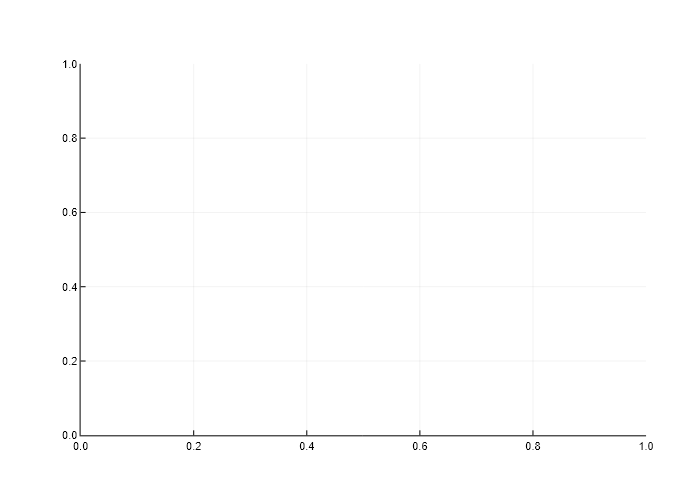

In [86]:
plot()

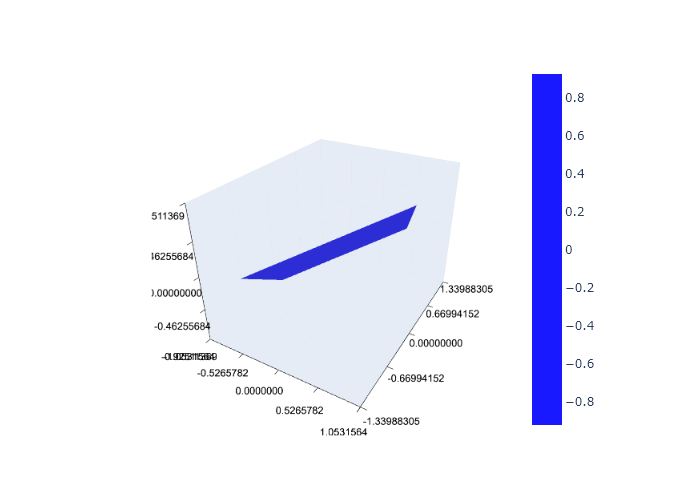

In [87]:
plot_matrix_as_plane(E1, color=:blue)

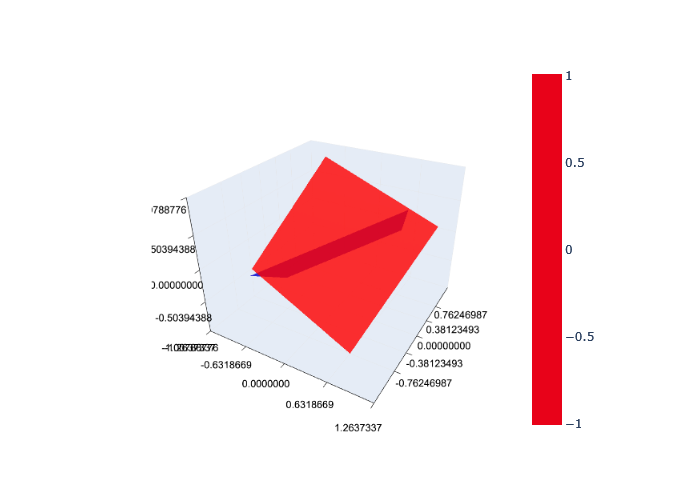

In [88]:
plot_matrix_as_plane(F1, color=:red)

In [89]:
U1,S11,V1=svd(E1'*F1,full=true)
temp,S12,V2=svd(E1'*F2,full=true)
U2,S22,V2=svd(E2'*F2,full=true)
D=[U1'*E1'*F1*V1 U1'*E1'*F2*V2
 U2'*E2'*F1*V1 U2'*E2'*F2*V2]
U=[U1 zeros(2,n-2)
 zeros(n-2,2) U2]
W=E*U*D*U'*E'

3×3 Matrix{Float64}:
  0.704909   -0.260682   0.659658
  0.707686    0.321137  -0.629326
 -0.0477862   0.910448   0.410854

 [C -S\
  S  C\
  0  0  I]

In [90]:
D

3×3 Matrix{Float64}:
  1.0          -5.55112e-17  3.19209e-16
  4.16334e-17   0.21845      0.975848
 -7.94266e-17  -0.975848     0.21845

In [91]:
norm(E*U*D*U'*E'*E1-F1)

0.46619077239896417

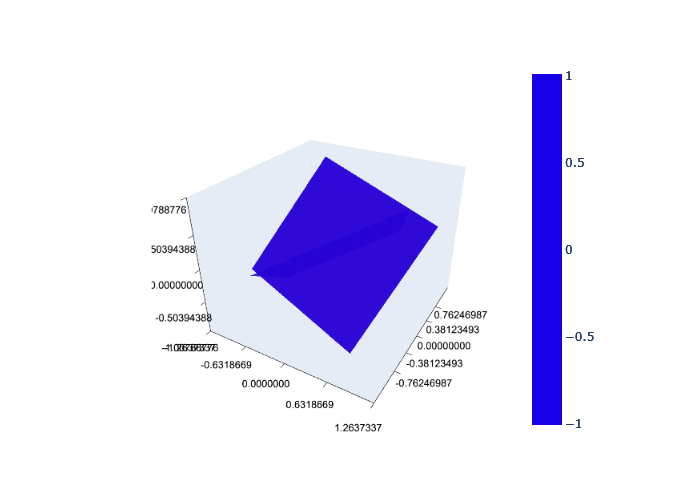

In [92]:
plot_matrix_as_plane(W*E1*U1*V1', color=:blue)

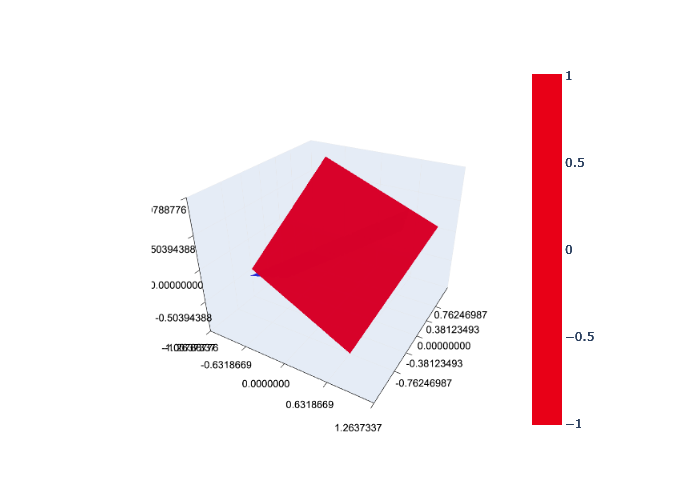

In [93]:
plot_matrix_as_plane(F1, color=:red)

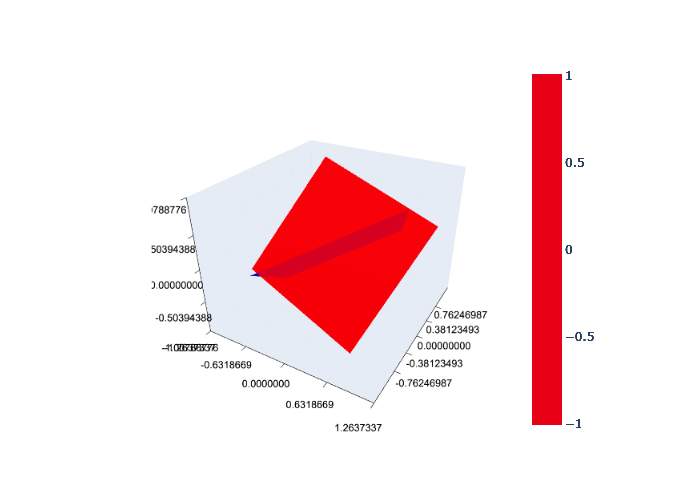

In [94]:
plot_matrix_as_plane(E1, color=:blue)
plot_matrix_as_plane(F1, color=:red)


In [95]:
norm(W*E1*U1-F1)

1.999999999999999

In [96]:
norm(W*E1*U1*V1'-F1)

8.491573300505515e-16

In [97]:
norm(D'*D-(1* Matrix(I, n, n)))

1.0156527229686685e-15

In [98]:
norm(W'*W-(1* Matrix(I, n, n)))

1.7331684667858377e-15

In [99]:
rotated=W*E1*U1
norm(rotated-F1*V1)

8.563843312570936e-16

In [100]:
function draw(M)
    x=M[:,1]
    y=M[:,2]
    z=x+im*y
    e=z.^2
    #print(norm(e[1]+e[2]+e[3]),"\n")
    #print(norm(e[1])+norm(e[2])+norm(e[3]))
    E=[real(e)' ; imag(e)']
    points=[zeros(2,1) E[:,1] E[:,1] E[:,1]+E[:,2] E[:,1]+E[:,2] E[:,1]+E[:,2]+E[:,3] E[:,1]+E[:,2]+E[:,3]]
    return points
end

draw (generic function with 1 method)

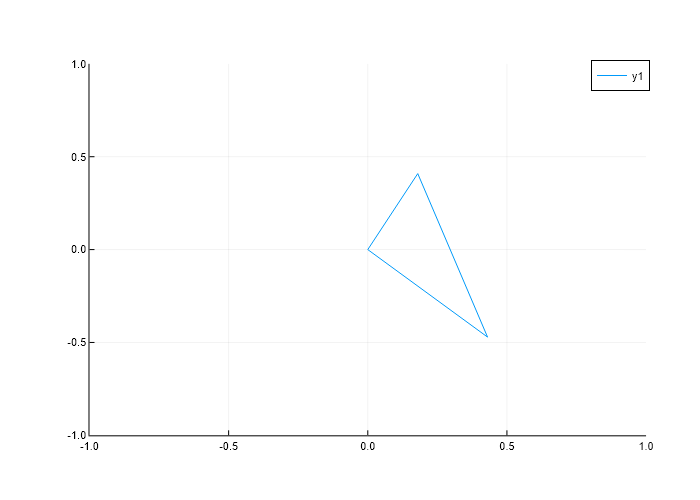

In [101]:
points=draw(E1)
plot(points[1,:],points[2,:],xlim=[-1,1], ylim=[-1,1])

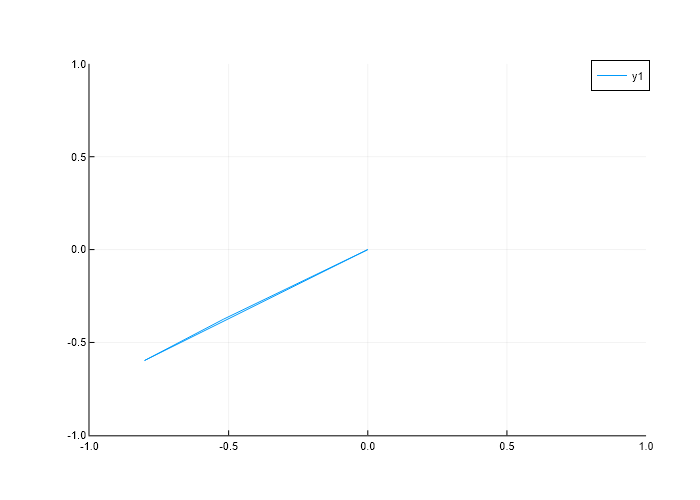

In [102]:
points=draw(F1)
plot(points[1,:],points[2,:],xlim=[-1,1], ylim=[-1,1])

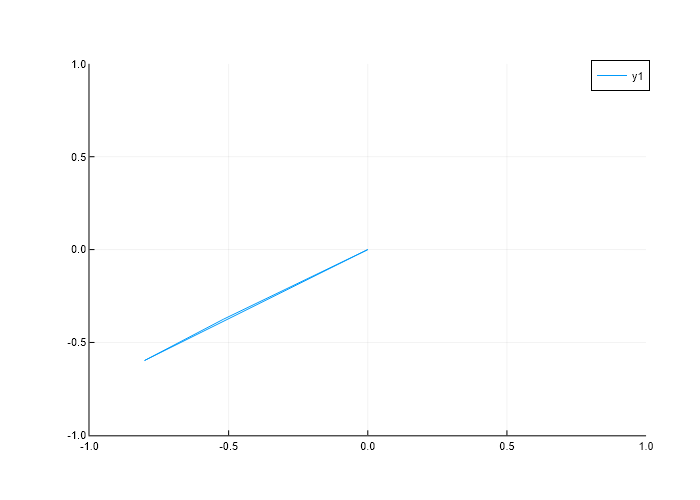

In [103]:
points1=draw(W*E1*U1*V1')
plot(points1[1,:],points1[2,:],xlim=[-1,1], ylim=[-1,1])